In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Estimacion Basica (Vainilla)

#### cargar datos

In [2]:
data = pd.read_csv("data/casas-california.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### visualizar casa de california

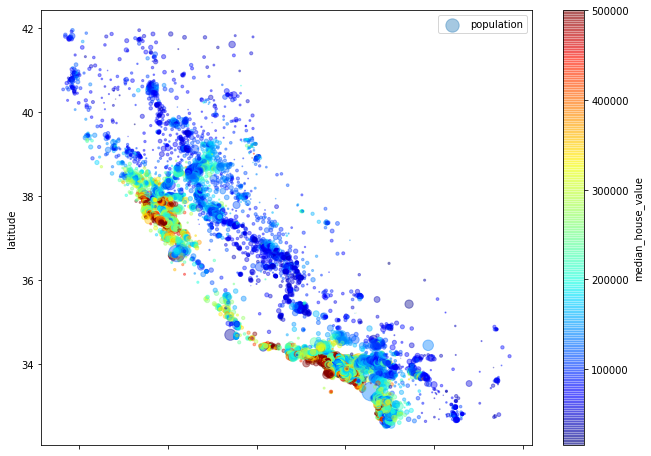

In [3]:
data.plot(kind ="scatter", x ="longitude", y ="latitude", alpha = 0.4,
             s = data["population"] / 100, label ="population", figsize =(11,8),
             c ="median_house_value", cmap = plt.get_cmap("jet"), colorbar = True, ) 
plt.legend()

#### correlaciones

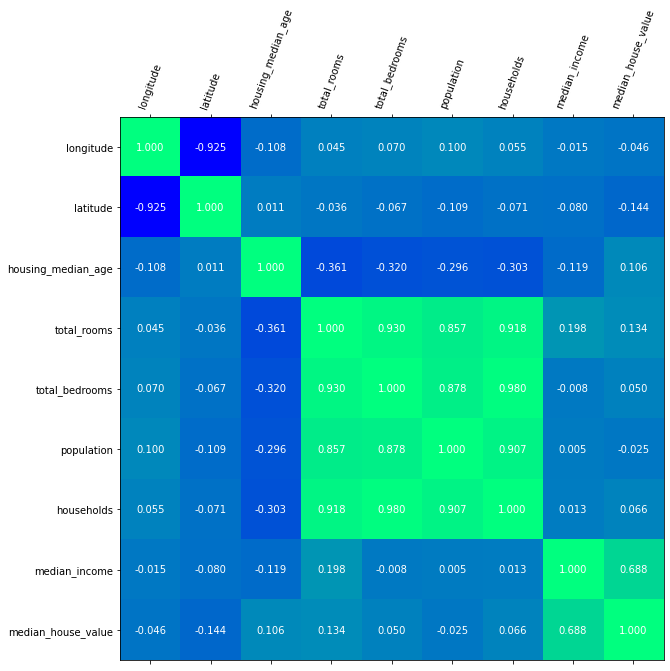

In [21]:
### EJERCICIO: (1pt) 
# utilize matplotlib para desplegar la matriz de correlaciones
size=10
corr = data.corr()
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr,cmap='winter')
plt.xticks(range(len(corr.columns)), corr.columns,rotation=70);
plt.yticks(range(len(corr.columns)), corr.columns);
for i in range(len(corr.values)):
    for j in range(len(corr.values)):
        text = ax.text(j, i, '{:0.3f}'.format(corr.values[i, j]),
                       ha="center", va="center", color="w")
plt.show()


In [24]:
### EJERCICIO: (1pt) 
# despliegue las correlaciones de la variable median_house_value
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### limpieza de datos

<AxesSubplot:>

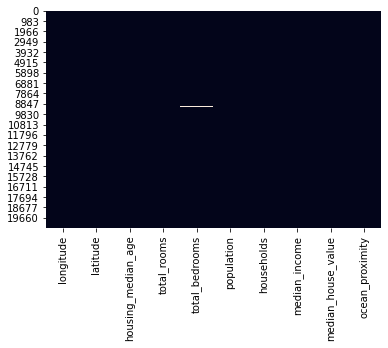

In [25]:
### EJERCICIO: (1pt)
# utilize seaborn para revisar de que no hay valores en blanco. despliegue el grafico de seaborn.
# convertir columnas en datos numericos
for c in data.columns:
    dataTypeObj = data.dtypes[c]
    if dataTypeObj != np.object:
        data[c] = pd.to_numeric(data[c], errors ='coerce')

sns.heatmap(data.isnull(), cbar=False)



<AxesSubplot:>

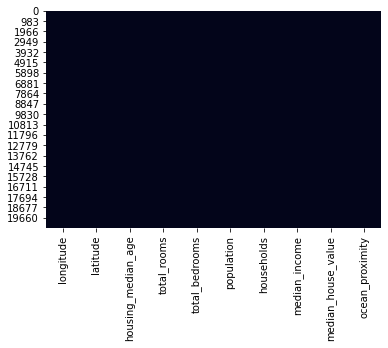

In [26]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

# vamos a revisar si los valores nulos
sns.heatmap(data.isnull(), cbar=False)

In [27]:
### EJERCICIO: (1pt)
# Revise los tipos de las columnas y verifique que cada uno esta definido correctamente 
# (ejemplo, la variable OCEAN_PROXIMITY debe ser categorica)
data["ocean_proximity"] = data["ocean_proximity"].astype('category')


#### test & training set

In [ ]:
### EJERCICIO: (1pt) 
# separe el dataset train:80%, test:70%, random_state=42 
# donde y = median_house_value

#### regresion lineal multiple

In [ ]:
### EJERCICIO: (1pt)
# estime el modelo de regresion lineal utilizando Sklearn.
# imprima los coeficientes


In [ ]:
### EJERCICIO: (1pt)
# utilize statsmodels para estimar las estadisticas del modelo actual.
# estime el MSE del train/test


## Estimacion Avanzada - Feature Engineering

En este momento, ud acaba de realizar la estimación del modelo más básico, sin aplicar transformaciones, ni escalamientos a las variables. 

**Aqui es donde se pone bonito...**

En esta sección debe estudiar las variables, sus distribuciones, para identificar qué tipo de cosas se pueden realizar para mejorar el modelo. Vuelva a calcular las estadísticas del modelo (antes y después) para que tenga un punto de referencia.

Algunas recomendaciones:
- Trate de comprender el rol de la variable en la prediccion. Tiene sentido?
- Algunos modelos trabajan mejor con menos variables. (aqui puede agregar o remover variables)
- Aplique transformaciones para "normalizar" variables (que tengan una distribucion quasi-normal)
- considere crear nuevas variables de ser necesario: por ejemplo bedrooms_per_room = data["total_bedrooms"] / data["total_rooms"]

In [ ]:
### EJERCICIO: (1pt)
# Aplique Escalamiento y Transformaciones

In [ ]:
### EJERCICIO: (1pt)
# Cree o Elimine variables 

In [ ]:
### EJERCICIO: (1pt)
# Aplique Escalamiento y Transformaciones

In [ ]:
### EJERCICIO: (1pt)
# Estime nuevamente el modelo de regresion lineal

In [ ]:
### EJERCICIO: (1pt)
# Calcule nuevamente las estadisticas para determinar si hay mejoras sobre el modelo.
# estime el MSE del train/test